Connecting to the Python mask, that has access to the database

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

BASE_URL = "http://127.0.0.1:8000"


Testing Base Endpoints for Plates and Nuts

In [2]:
def load_plates():
    r = requests.get(f"{BASE_URL}/plates", timeout=30)
    r.raise_for_status()
    return pd.DataFrame(r.json())

plates_df = load_plates()
plates_df


,platte
0,14
1,22
2,24
3,25
4,26
5,27
6,28


In [ ]:
def list_plate_nuts_flat():
    r = requests.get(f"{BASE_URL}/plate-nuts", timeout=30)
    r.raise_for_status()
    return pd.DataFrame(r.json())

plates_and_nuts = list_plate_nuts_flat()
plates_and_nuts

,platte,slot
0,14,1.0
1,14,2.0
2,14,3.0
3,14,4.0
4,14,5.0
...,...,...
134,28,36.0
135,28,37.0
136,28,38.0
137,28,39.0


In [ ]:
def load_nuts_for_plate(platte: int):
    r = requests.get(f"{BASE_URL}/plates/{platte}/nuts", timeout=30)
    r.raise_for_status()
    return r.json()

platte = int(plates_df.iloc[5]["platte"])
nuts = load_nuts_for_plate(platte)

platte, nuts


(27,
 [1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0])

In [ ]:
def load_data(platte: str, nut: float, limit: int = 1000) -> pd.DataFrame:
    r = requests.get(
        f"{BASE_URL}/data",
        params={"platte": platte, "nut": nut, "limit": limit},
        timeout=60,
    )
    r.raise_for_status()
    df = pd.DataFrame(r.json())

    if "Time" in df.columns:
        df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

    return df

nut = float(nuts[3]) 
platte = str(platte)
df = load_data(platte, nut, limit=1000)
df.head()


,Time,Duration_Seconds,Signal,DataOrigin,Value,Unit,Value_String,Description,Groupname,HFBlockEvent_GCode,...,HFBlockEvent_SeekOffset,HFBlockEvent_SelectedTool,HFBlockEvent_ActiveTool,HFBlockEvent_IpoGC,HFBlockEvent_ipoReadError,HFBlockEvent_laBuf,WCS_Y_mm,Nut,Platte,SensorType
0,2025-04-06 11:36:08.648,0.0,ENC_POS|3,HF_Data,-309.060000,mm,None,actual position of the active encoder,ActualAxisPosition,G4 F0 ; START,...,60.0,0.0,378.0,G0,None,0.0,-20.0,4.0,27,None
1,2025-04-06 11:36:08.648,0.0,ENC2_POS|1,HF_Data,-2036.866201,mm,None,actual position of encoder 2,Encoder2Position,G4 F0 ; START,...,60.0,0.0,378.0,G0,None,0.0,-20.0,4.0,27,None
2,2025-04-06 11:36:08.648,0.0,LOAD|3,HF_Data,0.170898,%,None,drive load,Load,G4 F0 ; START,...,60.0,0.0,378.0,G0,None,0.0,-20.0,4.0,27,None
3,2025-04-06 11:36:08.648,0.0,ENC1_POS|4,HF_Data,-1.999926,deg,None,actual position of encoder 1,Encoder1Position,G4 F0 ; START,...,60.0,0.0,378.0,G0,None,0.0,-20.0,4.0,27,None
4,2025-04-06 11:36:08.648,0.0,POWER|1,HF_Data,0.000000,W,None,drive actual power,Power,G4 F0 ; START,...,60.0,0.0,378.0,G0,None,0.0,-20.0,4.0,27,None


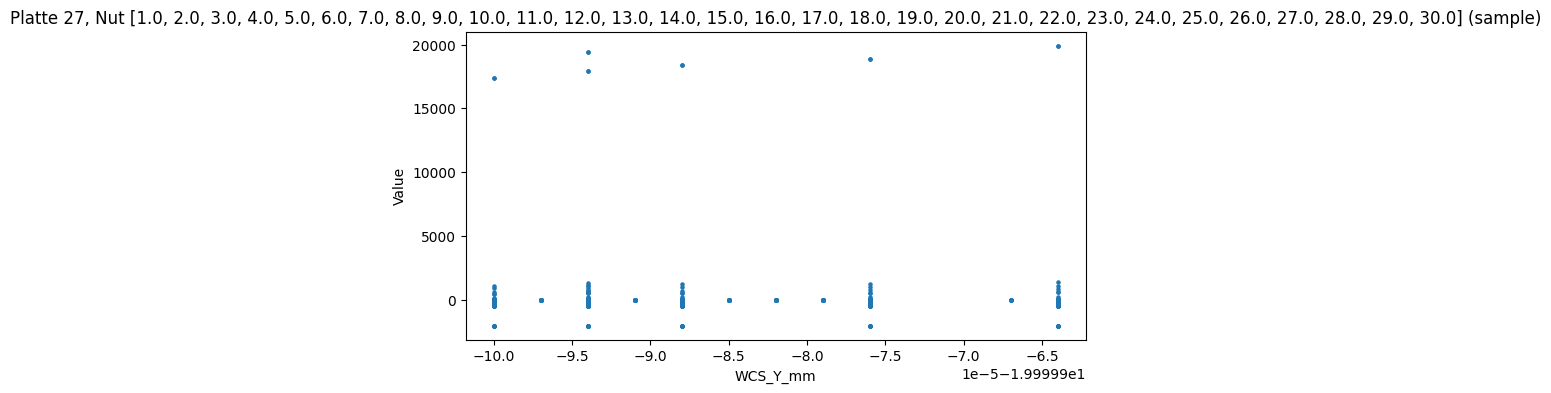

In [ ]:
# example plot
plot_df = df.dropna(subset=["Time", "Value"]).sort_values("Time")

plt.figure(figsize=(8, 4))
plt.scatter(plot_df["WCS_Y_mm"], plot_df["Value"], s=5)
plt.xlabel("WCS_Y_mm")
plt.ylabel("Value")
plt.title(f"Platte {platte}, Nut {nuts} (sample)")
plt.show()
